# I. Problem Statement and Dataset Description

## A. Link Dashboard

https://public.tableau.com/app/profile/wanda.nisrina/viz/AnalysisofDrugSalesVolume/AnalysisofDrugSalesVolumeForRetailPharmacyin2019-2020?publish=yes

## B. Latar Belakang

Sektor farmasi merupakan salah satu sektor vital dalam sistem kesehatan global yang terus mengalami pertumbuhan seiring dengan meningkatnya kebutuhan akan produk obat. Di tengah kompetitifnya penjualan produk obat, sektor kesehatan perlu untuk melakukan analisis tren penjualan sebelum memutuskan pembelian obat dalam skala besar di distributor farmasi. Dataset "Pharmaceutical Company Wholesale-Retail Data" yang digunakan memberikan gambaran komprehensif mengenai aktivitas penjualan produk obat dan rincian transaksi antara distributor, pembeli (dalam hal ini sektor kesehatan), produk obat, harga, dan periode penjualan.

Sebagai tim data analis dari Apotek ABC, analisis data ini menjadi sangat penting untuk mendukung pengambilan keputusan berbasis data dalam memilih distributor untuk pembelian produk obat. Sebagai calon pembeli produk obat dari distributor, rumah sakit maupun apotek perlu mempertimbangkan untuk melihat juga tren penjualan produk obat dari tiap distributor obat. Dengan melakukan analisis terhadap data penjualan ini, pihak yang terlibat diantaranya pemiliki Apotek, tim sales marketing, serta tim PPIC, diharapkan dapat memperoleh wawasan dalam meningkatkan efisiensi bisnis.

## C. SMART Framework

**Metrics Business** : 
1. Analisis parameter harga dan penjualan untuk mencapai Cost efficiency pada pengadaan obat di periode selanjutnya 
2. Melihat sales volume berdasarkan waktu dan distributor untuk mengetahui tren penjualan

**Berikut tujuan analisis menggunakan SMART Framework**:
- Specific: 
1. Menganalisis tren penjualan produk obat dari distributor farmasi berdasarkan kelas obat, periode penjualan pada tahun 2019-2020, lokasi, dan harga obat dengan tujuan efisiensi cost pembelian obat untuk periode selanjutnya
2. Menganalisis data penjualan obat pada Apotek retail
- Measurabele: Dapat mengurangi cost pembelian obat sebesar 10% dari periode sebelumnya
- Achievable:
1. Menganalisis parameter penting yang menjadi landasan utama dari pembeli dalam memilih distributor saat akan melakukan pembelian obat
2. Strategi Inventory: Melihat tren penjualan obat berdasarkan periode dan lokasi untuk menentukan pada periode dan lokasi mana yang memiliki nilai penjualan tertinggi dan terendah
- Relevant: 
1. Dapat menentukan pembelian produk obat di distributor mana berdasarkan hasil analisis
2. Mengantisipasi stok untuk inventori obat agar tidak terjadi kelebihan atau kekurangan barang
- Time Bound: Hasil data analisis ini akan digunakan dalam jangka waktu 1 tahun untuk menentukan pembelian produk obat dari distributor

## D. Problem Statement & 5W+1H

- **PROBLEM STATEMENT**

Untuk  memaksimalkan efisiensi cost dan penjualan di Apotek ABC, perlu dibuat suatu analisis data untuk menjadi landasan dalam memilih distributor obat. Data hasil analisis ini berguna untuk membandingkan harga dan penjualan produk obat dari masing-masing distributor di Apotek retail, sehingga dapat menjadi acuan untuk pemilihan distributor pada periode pembelian dalam satu tahun ke depan. Melalui analisis ini, Apotek ABC diharapkan dapat mengurangi cost pembelian obat hingga 10% untuk periode satu tahun ke depan, sehingga bisa lebih memaksimalkan profit.

- **5W+1H**

Penjabaran masalah dengan metode 5W+1H:
+ Distributor manakah yang memiliki tingkat penjualan tertinggi pada tiap golongan kelas obat?
+ Produk dari distributor manakah yang memiliki harga jual paling tinggi dan paling rendah?
+ Distributor manakah yang memiliki produk return yang tinggi?
+ Bagaimana grafik penjualan obat tiap bulan selama periode analisis?
+ Bagaimana persebaran harga jual berdasarkan golongan kelas obat? 
+ Apakah waktu penjualan berpengaruh terhadap harga jual obat?

# II. Data Loading

### Import Libraries

In [67]:
# IMPORT LIBRARY 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np


### Membaca CSV File

In [2]:
# Membaca CSV file
data = pd.read_csv ('pharma-data.csv')

#Membuat dataframe
df = data

df

,Distributor,Customer Name,City,Country,Latitude,Longitude,Channel,Sub-channel,Product Name,Product Class,Quantity,Price,Sales,Month,Year,Name of Sales Rep,Manager,Sales Team
0,Gottlieb-Cruickshank,"Zieme, Doyle and Kunze",Lublin,Poland,51.2333,22.5667,Hospital,Private,Topipizole,Mood Stabilizers,4.0,368,1472.0,January,2018,Mary Gerrard,Britanny Bold,Delta
1,Gottlieb-Cruickshank,Feest PLC,Świecie,Poland,53.4167,18.4333,Pharmacy,Retail,Choriotrisin,Antibiotics,7.0,591,4137.0,January,2018,Jessica Smith,Britanny Bold,Delta
2,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,50.0833,18.5000,Pharmacy,Institution,Acantaine,Antibiotics,30.0,66,1980.0,January,2018,Steve Pepple,Tracy Banks,Bravo
3,Gottlieb-Cruickshank,Barton Ltd Pharma Plc,Czeladź,Poland,50.3333,19.0833,Hospital,Private,Lioletine Refliruvax,Analgesics,6.0,435,2610.0,January,2018,Mary Gerrard,Britanny Bold,Delta
4,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,53.7800,20.4942,Pharmacy,Retail,Oxymotroban Fexoformin,Analgesics,20.0,458,9160.0,January,2018,Anne Wu,Britanny Bold,Delta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254077,Bashirian-Kassulke,"Koch, Borer and Hagenes Pharmaceutical Ltd",Lauf,Germany,49.5103,11.2772,Hospital,Private,Pentastrin,Antibiotics,919.0,497,456743.0,December,2020,Thompson Crawford,James Goodwill,Alfa
254078,Bashirian-Kassulke,Hane Ltd Pharmaceutical Ltd,Aichach,Germany,48.4500,11.1333,Hospital,Private,Abranatal Lysoprosate,Antiseptics,432.0,681,294192.0,December,2020,Anne Wu,Britanny Bold,Delta
254079,Bashirian-Kassulke,Harris-Conroy Pharmacy,Wilhelmshaven,Germany,53.5167,8.1333,Pharmacy,Retail,Adideine,Mood Stabilizers,320.0,678,216960.0,December,2020,Abigail Thompson,Tracy Banks,Bravo
254080,Bashirian-Kassulke,Balistreri Group Pharm,Böblingen,Germany,48.6833,9.0000,Hospital,Government,Feruprazole,Mood Stabilizers,565.0,115,64975.0,December,2020,Stella Given,Alisha Cordwell,Charlie


**Penjelasan Nama Kolom**

1. Distributor = Nama perusahaan distributor obat
2. Customer Name = Nama perusahaan yang membeli produk obat
3. City = Kota tempat customer berada
4. Country = Negara tempat customer berada
5. Latitude = Latitude tempat customer berada
6. Longitude = Longitude tempat customer berada
7. Channel = Tipe customer (RS / Apotek) 
8. Sub-channel = Instansi customer
9. Product Name = Nama Obat
10. Product Class = Golongan Obat
11. Quantity = Jumlah dibeli
12. Price = Harga produk obat
13. Sales = Total sales (quantity x price)
14. Month = Bulan pembelian
15. Year = Tahun pembelian
16. Name of Sales Rep = Nama sales
17. Manager = Manager sales
18. Sales Team = Tim sales



### Melihat summary data

In [3]:
#Melihat summary dataset dan list nama kolom

df.info()
print(list(df.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254082 entries, 0 to 254081
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Distributor        254082 non-null  object 
 1   Customer Name      254082 non-null  object 
 2   City               254082 non-null  object 
 3   Country            254082 non-null  object 
 4   Latitude           254082 non-null  float64
 5   Longitude          254082 non-null  float64
 6   Channel            254082 non-null  object 
 7   Sub-channel        254082 non-null  object 
 8   Product Name       254082 non-null  object 
 9   Product Class      254082 non-null  object 
 10  Quantity           254082 non-null  float64
 11  Price              254082 non-null  int64  
 12  Sales              254082 non-null  float64
 13  Month              254082 non-null  object 
 14  Year               254082 non-null  int64  
 15  Name of Sales Rep  254082 non-null  object 
 16  Ma

### Melihat nilai unqiue dari tiap kolom

In [4]:
#melihat nilai unik dari masing-masing kolom
for col in df:
    print(col, df[col].unique())

Distributor ['Gottlieb-Cruickshank  ' 'Carter-Conn  ' 'Prohaska-Kuhic ' 'Smith Inc '
 'Rohan   ' 'Schuppe Inc ' 'Cassin  ' 'Graham and Sons '
 'Stehr-Champlin  ' 'Kris LLC  ' 'Rogahn-Klein ' 'Lindgren-Simonis Pharm'
 'Beier  ' 'Gerlach LLC ' 'Erdman  ' 'Koss   ' 'Schaefer LLC '
 'Crist Inc ' 'Rohan and Sons  ' 'Lockman  ' 'Kozey-Emmerich '
 'Gleason   ' 'Romaguera-Fay  ' 'Daugherty-Rempel  ' 'Welch-Langworth '
 'Bashirian-Kassulke  ' 'Nader-Gaylord  ' 'Hansen Group Pharm' 'Lesch   ']
Customer Name ['Zieme, Doyle and Kunze ' 'Feest PLC '
 'Medhurst-Beer Pharmaceutical Limited' 'Barton Ltd Pharma Plc'
 'Keeling LLC Pharmacy' 'Runte-Marquardt Pharmaceutical Ltd'
 'Blick, Pacocha and Schowalter ' 'Leuschke PLC Pharmacy'
 'Miller-Satterfield Pharma Plc' 'Bashirian-Kassulke Pharma Plc'
 'Wolff Group Pharm' 'Denesik, Walter and Beatty Pharma Plc'
 'Breitenberg-Kuhn Pharmacy' 'McClure, Zemlak and Dibbert Pharma Plc'
 'Block-Romaguera Pharmaceutical Limited'
 'Hahn, Rutherford and Gislason Phar

# III. Data Cleaning

### Mengecek Missing Value 

In [5]:
missing_values = df.isnull().sum()
# print(missing_values)
missing_values

Distributor          0
Customer Name        0
City                 0
Country              0
Latitude             0
Longitude            0
Channel              0
Sub-channel          0
Product Name         0
Product Class        0
Quantity             0
Price                0
Sales                0
Month                0
Year                 0
Name of Sales Rep    0
Manager              0
Sales Team           0
dtype: int64

Dari dataset yang akan dianalisis, data tidak memiliki missing value sehingga tidak perlua handling missing value

### Slicing Kolom dan Filter Value

Pada section ini, akan dipilih kolom yang digunakan untuk analisis. Kolom yang akan dihapus yaitu 'Latitude', 'Longitude', 'Name of Sales Rep', 'Manager', dan 'Sales Team'

Fokus analisis yaitu akan memfilter data Year hanya di tahun 2019 - 2020, kemudian pada kolom Channel akan dipilih "Pharmacy" (Apotek) dengan sub-channel "Retail".
Hal ini dikarenakan ingin melihat data pembelian obat pada periode terbaru dengan fokus pembelian oleh Apotek yang berbasis retail (Dalam hal ini Apotek ABC adalah apotek retail yang memiliki cabang di beberapa kota).

In [6]:
#Menghapus Kolom yang tidak dibutuhkan

df.drop('Latitude', axis=1, inplace=True)
df.drop('Longitude', axis=1, inplace=True)
df.drop('Name of Sales Rep', axis=1, inplace=True)
df.drop('Manager', axis=1, inplace=True)
df.drop('Sales Team', axis=1, inplace=True)

In [7]:
df

,Distributor,Customer Name,City,Country,Channel,Sub-channel,Product Name,Product Class,Quantity,Price,Sales,Month,Year
0,Gottlieb-Cruickshank,"Zieme, Doyle and Kunze",Lublin,Poland,Hospital,Private,Topipizole,Mood Stabilizers,4.0,368,1472.0,January,2018
1,Gottlieb-Cruickshank,Feest PLC,Świecie,Poland,Pharmacy,Retail,Choriotrisin,Antibiotics,7.0,591,4137.0,January,2018
2,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,Pharmacy,Institution,Acantaine,Antibiotics,30.0,66,1980.0,January,2018
3,Gottlieb-Cruickshank,Barton Ltd Pharma Plc,Czeladź,Poland,Hospital,Private,Lioletine Refliruvax,Analgesics,6.0,435,2610.0,January,2018
4,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,Pharmacy,Retail,Oxymotroban Fexoformin,Analgesics,20.0,458,9160.0,January,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
254077,Bashirian-Kassulke,"Koch, Borer and Hagenes Pharmaceutical Ltd",Lauf,Germany,Hospital,Private,Pentastrin,Antibiotics,919.0,497,456743.0,December,2020
254078,Bashirian-Kassulke,Hane Ltd Pharmaceutical Ltd,Aichach,Germany,Hospital,Private,Abranatal Lysoprosate,Antiseptics,432.0,681,294192.0,December,2020
254079,Bashirian-Kassulke,Harris-Conroy Pharmacy,Wilhelmshaven,Germany,Pharmacy,Retail,Adideine,Mood Stabilizers,320.0,678,216960.0,December,2020
254080,Bashirian-Kassulke,Balistreri Group Pharm,Böblingen,Germany,Hospital,Government,Feruprazole,Mood Stabilizers,565.0,115,64975.0,December,2020


In [8]:
#Memfilter kolom

df_filtered = df[(df['Channel'] == 'Pharmacy') & (df['Sub-channel'] == 'Retail') & (df['Year'] >= 2019)]

df_filtered

,Distributor,Customer Name,City,Country,Channel,Sub-channel,Product Name,Product Class,Quantity,Price,Sales,Month,Year
150921,Erdman,Turner Ltd Pharmacy,Dortmund,Germany,Pharmacy,Retail,Topifribrate,Analgesics,5.0,621,3105.0,January,2019
150928,Erdman,Huel Inc Pharm,Zwickau,Germany,Pharmacy,Retail,Interfestar,Antibiotics,60.0,62,3720.0,January,2019
150933,Erdman,Kozey Ltd Pharmacy,Stralsund,Germany,Pharmacy,Retail,Amphesirox,Antiseptics,20.0,25,500.0,January,2019
150938,Erdman,Streich PLC,Bottrop,Germany,Pharmacy,Retail,Microroban Afatigomar,Antimalarial,60.0,478,28680.0,January,2019
150947,Erdman,"Torphy, Pfeffer and Jakubowski Pharmaceutical Ltd",Leipzig,Germany,Pharmacy,Retail,Factolamide,Antiseptics,30.0,345,10350.0,January,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
254070,Koss,Paucek PLC,Espelkamp,Germany,Pharmacy,Retail,Requimadin,Antimalarial,10.0,408,4080.0,December,2020
254072,Koss,Walsh-Brown Pharma Plc,Osnabrück,Germany,Pharmacy,Retail,Cephozumab Synmethate,Antibiotics,10.0,768,7680.0,December,2020
254075,Koss,"Schinner, Gaylord and Treutel Pharmacy",Hamm,Germany,Pharmacy,Retail,Relenvice,Antimalarial,26.0,459,11934.0,December,2020
254079,Bashirian-Kassulke,Harris-Conroy Pharmacy,Wilhelmshaven,Germany,Pharmacy,Retail,Adideine,Mood Stabilizers,320.0,678,216960.0,December,2020


### Menyimpan data bersih untuk analisis ke CSV

In [68]:
df_filtered.to_csv('filtered_dataset.csv', index=False)

# IV. EXPLORATION AND ANALYSIS

In [70]:
#Membaca CSV file yang sudah di di filter
df_fix = pd.read_csv ('filtered_dataset.csv')

## Analisis Penjualan Produk Obat Dari Tiap Distributor

### Melihat Total Penjualan Produk Berdasarkan Distributor

In [62]:
#Membuat dataframe baru untuk melihat parameter Qty berdasarkan kelas obat
qty_class = df_fix.groupby(['Distributor', 'Product Class'])['Quantity'].sum().reset_index()

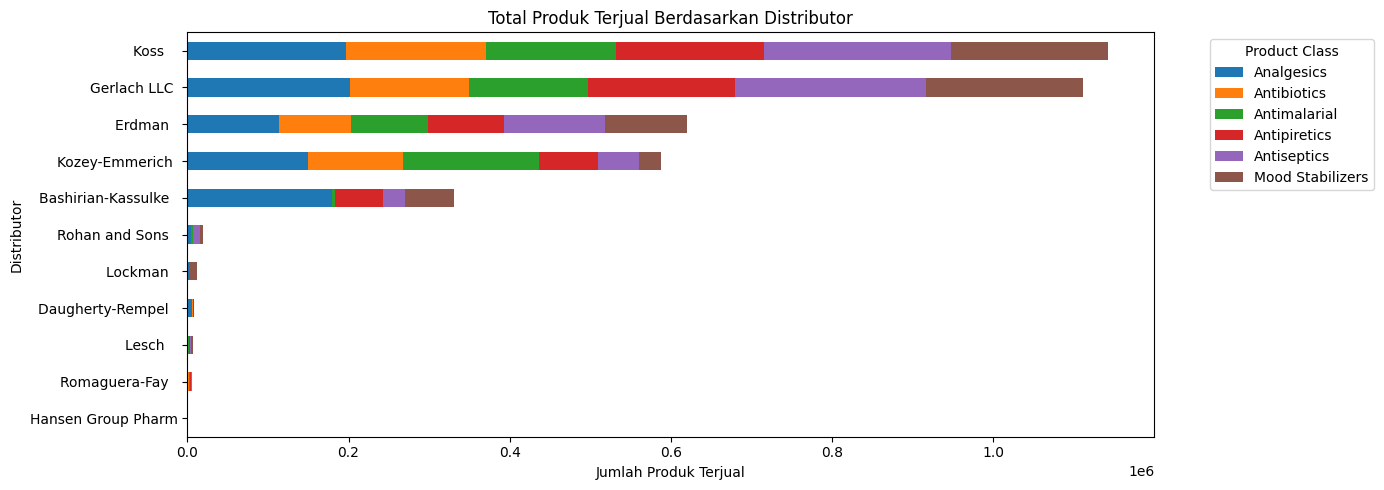

In [63]:
# Pivot dulu datanya agar bisa di-stack
pivot_df = qty_class.pivot_table(
    index='Distributor',
    columns='Product Class',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

# Sort berdasarkan total quantity
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values().index]

# Plot stacked bar
pivot_df.plot(kind='barh', stacked=True, figsize=(14, 5))

plt.title('Total Produk Terjual Berdasarkan Distributor')
plt.xlabel('Jumlah Produk Terjual')
plt.ylabel('Distributor')
plt.legend(title='Product Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Hasil Analisis**
- Berdasarkan grafik di atas, Distributor dengan tingkat penjualan tertinggi yaitu Koss dan Gerlach LLC dengan total penjualan hampir 1.2M produk. Penjualan distributor lainnya tidak setinggi penjualan Koss dan Gerlach LLC, dengan total penjualan yang hanya setengah sampai sampai kurang dari seperempat penjualan Koss dan Gerlach LLC
- Penjualan produk obat antar tiap golongan pada Distributor Koss dan Gerlach LLC tidak terlalu berbeda jauh. Koss memimpin penjualan di produk golongan Antibiotik, dan Antipiretik. Gerlach LLC memimpin penjualan di produk golongan Analgesik, Antiseptik, dan Mood Stabilizer. Kozey-Emmerich memimpin penjualan di golongan Antimalaria

### Melihat Harga Jual Produk Berdasarkan Distributor

In [64]:
#Membuat dataframe baru untuk melihat median harga jual berdasarkan kelas obat
median_class = df_fix.groupby(['Distributor', 'Product Class'])['Price'].median().reset_index()
median_class = median_class.sort_values(by=['Product Class', 'Price'], ascending=[True, True])

Pada analisis untuk melihat Price by Product Class, dipilih median karena median menggambarkan nilai tengah dari suatu data tanpa terpengaruh adanya nilai outliers. Selain itu, analisis ini bertujuan untuk melihat representasi harga dari tiap distributor pada golongan obat tertentu

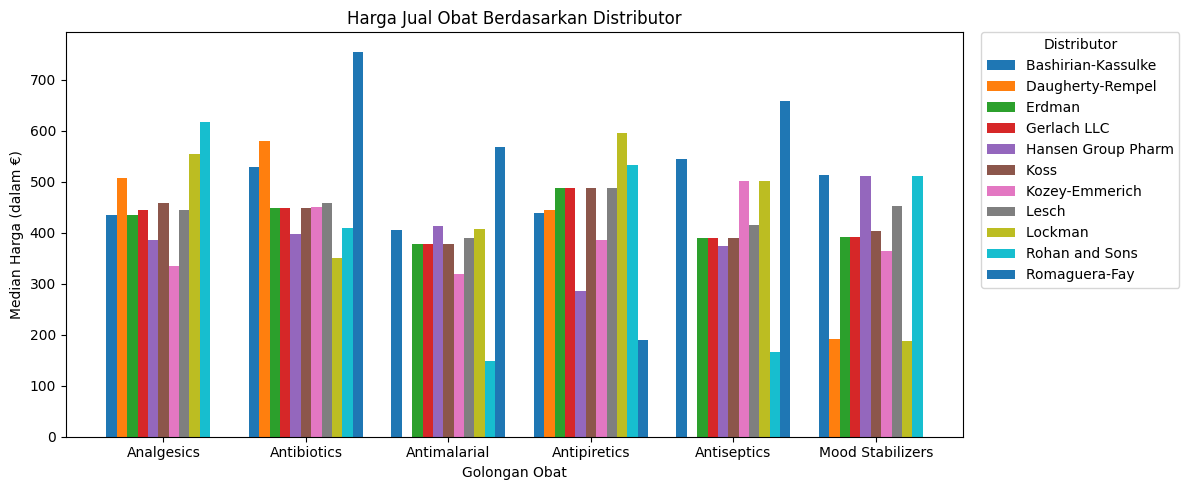

In [65]:
# Buat pivot dulu untuk visualisasi grouped bar
pivot_df = median_class.pivot_table(
    index='Product Class',
    columns='Distributor',
    values='Price',
    aggfunc='median'  
)

# Set posisi bar
product_classes = pivot_df.index
distributors = pivot_df.columns
x = np.arange(len(product_classes))  
width = 0.8 / len(distributors)  

fig, ax = plt.subplots(figsize=(12, 5))

# Plot setiap distributor (grouped bars)
for i, distributor in enumerate(distributors):
    ax.bar(
        x + i * width,
        pivot_df[distributor],
        width=width,
        label=distributor
    )

# Set label dan legend
ax.set_xticks(x + width * (len(distributors) - 1) / 2)
ax.set_xticklabels(product_classes, rotation=360)
ax.set_ylabel('Median Harga (dalam €)')
ax.set_xlabel('Golongan Obat')
ax.set_title('Harga Jual Obat Berdasarkan Distributor')
ax.legend(
    title='Distributor',
    bbox_to_anchor=(1.02, 1),  # Geser ke kanan luar
    loc='upper left',
    borderaxespad=0
)

plt.tight_layout()
plt.show()

**Hasil Analisis**
- Pada golongan Analgesik, Kozey-Emmerich memiliki median harga produk paling kecil dan Rohan and Sons adalah paling tinggi.Selain itu, Romaguera-Fay tidak menjual produk Analgesik
- Harga rata-rata jual produk Analgesik dari seluruh distributor berkisar dari €400 - €500, sehingga dapat disimpulkan harga pasaran untuk produk Analgesik yaitu €400 - €500.
- Pada golongan Antibiotik, Lockman memiliki median harga produk paling kecil dan Romaguera-Fay adalah paling tinggi.
- Harga rata-rata jual produk Antibiotik dari seluruh distributor berkisar dari €400 - €550, sehingga dapat disimpulkan harga pasaran untuk produk Antibiotik yaitu €400 - €550.
- Pada golongan Antimalaria, Rohan and Sons memiliki median harga produk paling kecil dan Romaguera-Fay adalah paling tinggi. Selain itu, Daugherty-Rempel tidak menjual produk Antimalaria
- Harga rata-rata jual produk Antimalaria dari seluruh distributor berkisar dari €370 - €420, sehingga dapat disimpulkan harga pasaran untuk produk Antimalaria yaitu €370 - €420.
- Pada golongan Antipiretik, Romaguera-Fay memiliki median harga produk paling kecil dan Lokcman adalah paling tinggi. 
- Harga rata-rata jual produk Antipiretik dari seluruh distributor berkisar dari €400 - €500, sehingga dapat disimpulkan harga pasaran untuk produk Antipiretik yaitu €400 - €500.
- Pada golongan Antiseptik, Rohan and Sons memiliki median harga produk paling kecil dan Romaguera-Fay adalah paling tinggi. Selain itu, Daugherty-Rempel tidak menjual produk Antiseptik
- Harga rata-rata jual produk Mood Stabilizer dari seluruh distributor berkisar dari €350 - €500, sehingga dapat disimpulkan harga pasaran untuk produk Mood Stabilizer yaitu €350 - €500.
- Pada golongan Mood Stabilizer, Lockman memiliki median harga produk paling kecil dan Bashirian-Kassulke adalah paling tinggi. Selain itu, Romaguera-Fay tidak menjual produk Mood Stabilizer

**Global Analisis**
- Rata-rata representasi harga obat untuk tiap golongan yaitu di rentang €350 - €500.
- Secara keseluruhan, Romaguera-Fay memiliki harga jual tertinggi diantara distributor lainnya.
- Harga dari top 2 distributor yaitu Koss dan Gerlach LLC masih berada pada rentang harga rata-rata penjualan produk.
- Distributor Daugherty-Rempel tidak menjual produk golongan Antimalaria dan Antiseptik, sedangkan Romaguera-Fay tidak menjual golongan Analgesik dan Mood Stabilizer

### Melihat Retur Produk Berdasarkan Distributor

In [32]:
#melihat retur produk dari distributor

return_class = df_fix[df_fix['Quantity'] < 0]
return_class = return_class.groupby(['Distributor','Product Class'])['Quantity'].sum().reset_index()
return_class.rename(columns = {"Quantity": "Return Qty"}, inplace= True)
#ubah agar minus hilang, sehingga lebih mudah terlihat grafiknya
return_class ['Return Qty'] = return_class['Return Qty'].astype(str)
return_class['Return Qty'] = return_class['Return Qty'].str.replace('-','')
return_class ['Return Qty'] = return_class['Return Qty'].astype(float)

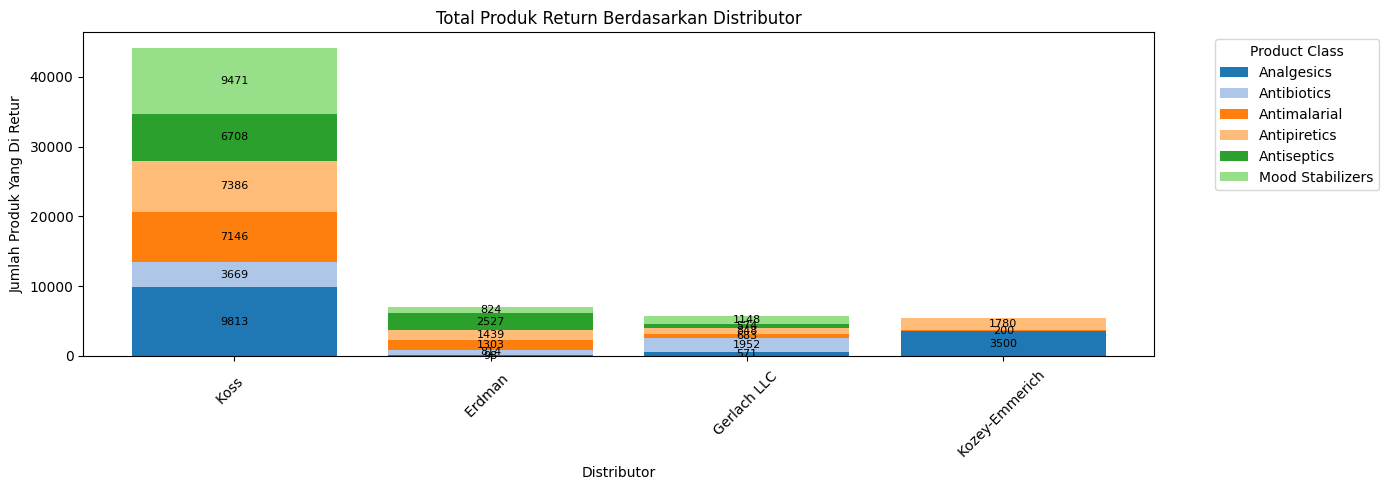

In [42]:
# Pivot dulu datanya agar bisa di-stack

pivot_df = return_class.pivot_table(
    index='Distributor',
    columns='Product Class',
    values='Return Qty',
    aggfunc='sum',
    fill_value=0
)

# Sort berdasarkan total quantity
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]

# Plot manual agar bisa tambah teks
fig, ax = plt.subplots(figsize=(14, 5))

bottom = [0] * len(pivot_df)  
x = range(len(pivot_df))      

colors = plt.cm.tab20.colors  

for i, col in enumerate(pivot_df.columns):
    values = pivot_df[col]
    bars = ax.bar(x, values, bottom=bottom, label=col, color=colors[i % len(colors)])

    # Tambahkan teks di tengah tiap stack
    for j, val in enumerate(values):
        if val > 0:
            ax.text(
                x=j,
                y=bottom[j] + val / 2,
                s=f'{int(val)}',
                ha='center',
                va='center',
                fontsize=8,
                color='black'
            )
    
    # Update bottom untuk stack berikutnya
    bottom = [bottom[k] + values[k] for k in range(len(values))]

# Label sumbu dan judul
ax.set_title('Total Produk Return Berdasarkan Distributor')
ax.set_ylabel('Jumlah Produk Yang Di Retur')
ax.set_xlabel('Distributor')
ax.set_xticks(x)
ax.set_xticklabels(pivot_df.index, rotation=45)
ax.legend(title='Product Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



**Hasil Analisis**
- Koss merupakan distributor dengan tingkat retur paling tinggi. Kemudian disusul Erdman, Gerlach LLC, dan Kozey-Emmerich
- Analgesik merupakan golongan obat paling banyak di retur.
- Walaupun Koss memiliki penjualan paling tinggi, namun perlu dipertimbangkan juga karena Koss juga memiliki jumlah produk retur yang tinggi

## Analisis Penjualan Produk Obat Berdasarkan Periode Penjualan 

### Tren Penjualan Obat Berdasarkan Bulan

In [54]:
#Melihat tren penjualan obat berdasarkan periode

#Membuat dataframe baru untuk melihat parameter Qty berdasarkan kelas obat dan periode waktu
period_class = df_fix.groupby(['Month','Product Class'])['Quantity'].mean().reset_index()
period_class['Month_Only'] = pd.to_datetime(period_class['Month'] + ' 2000', format='%B %Y') #buat code untuk merubah tipe data month ke datetime dengan menambah tahun (karena month saja tidak bisa)
period_sorted = period_class.sort_values(by='Month_Only', ascending=True)

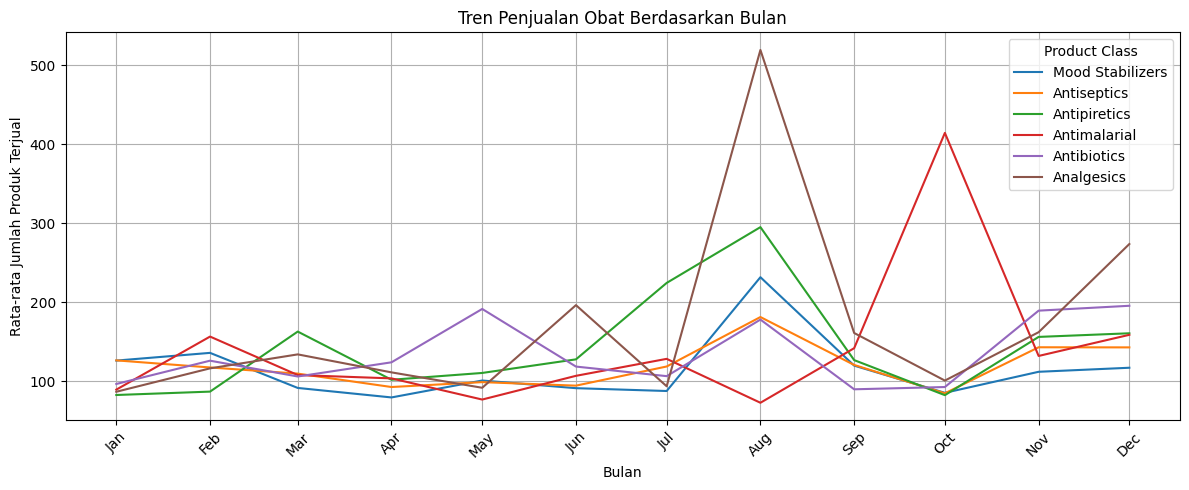

In [53]:
# Buat figure dan axis
fig, ax = plt.subplots(figsize=(12, 5))

# Loop setiap kelas produk
for product_class in period_sorted['Product Class'].unique():
    subset = period_sorted[period_sorted['Product Class'] == product_class]
    ax.plot(
        subset['Month_Only'],
        subset['Quantity'],
        label=product_class
    )

# Atur format sumbu x
ax.set_title('Tren Penjualan Obat Berdasarkan Bulan')
ax.set_xlabel('Bulan')
ax.set_ylabel('Rata-rata Jumlah Produk Terjual')
ax.legend(title='Product Class')
ax.grid(True)

# Format bulan pada x-axis
ax.set_xticks(subset['Month_Only'].unique())
ax.set_xticklabels(
    [pd.to_datetime(d).strftime('%b') for d in subset['Month_Only'].unique()],
    rotation=45
)

plt.tight_layout()
plt.show()


**Hasil Analisis**

- Tujuan analisis: Untuk mengetahui bulan-bulan dengan pembelian obat tertinggi untuk keperluan inventroy (menentukan safety stock dan reorder point)
- Pembelian obat yang dilakukan oleh Apotek retail meningkat di Q3 dan Q4
- Obat golongan analgesik merupakan golongan obat yang paling banyak dibeli oleh Apotek retail, disusul dengan obat golongan antimalaria

## Statistik Deskriptif

#### Melihat persebaran harga jual obat berdasarkan golongan obat

##### Analgesik

In [18]:
#membuat table utk class Analgesik

analgesic_class = df_fix[df_fix['Product Class'] == 'Analgesics']
analgesic_class = analgesic_class [['Distributor', 'Product Class', 'Product Name', 'Price']]
analgesic_class

#print nilai central tendency utk Analgesik
print('Rata-rata Harga Produk Golongan Analgesik:',analgesic_class['Price'].mean())
print('Median Harga Produk Golongan Analgesik:',analgesic_class['Price'].median())
print('Modus Harga Produk Golongan Analgesik:',analgesic_class['Price'].mode().values[0])
print('Standar Deviasi Harga Produk Golongan Analgesik:',analgesic_class['Price'].std())

Rata-rata Harga Produk Golongan Analgesik: 435.59241323648104
Median Harga Produk Golongan Analgesik: 458.0
Modus Harga Produk Golongan Analgesik: 605
Standar Deviasi Harga Produk Golongan Analgesik: 220.08399399929033


**Hasil Analisis**
- Rata-rata harga jual obat golongan analgesik dari distributor yaitu €435 per 1 packs
- Median harga jual obat golongan analgesik dari distributor yaitu €458 per 1 packs. Data median dan mean tidak terlalu jauh, sehingga nilai tengah dari harga obat berkisar di 435 - 458.
- Harga paling jual paling banyak (Modus) obat golongan analgesik dari distributor yaitu €605 per 1 packs. Nilai ini juga cukup jauh dari nilai tengah yang menandakan adanya variasi data
- Standar deviasi dari analisis ini cukup tinggi yaitu 220 (sekitar 50% dari mean). Hal ini menandakan sebagian besar harga produk analgesik cenderung berada dalam jarak ±€220 dari rata-rata

##### Antiseptics

In [19]:
#membuat table utk class Antiseptik

antiseptic_class = df_fix[df_fix['Product Class'] == 'Antiseptics']
antiseptic_class = antiseptic_class [['Distributor', 'Product Class', 'Product Name', 'Price']]
antiseptic_class

#print nilai central tendency utk Antiseptik
print('Rata-rata Harga Produk Golongan Antiseptik:',antiseptic_class['Price'].mean())
print('Median Harga Produk Golongan Antiseptik:',antiseptic_class['Price'].median())
print('Modus Harga Produk Golongan Antiseptik:',antiseptic_class['Price'].mode().values[0])
print('Standar Deviasi Harga Produk Golongan Antiseptik:',antiseptic_class['Price'].std())

Rata-rata Harga Produk Golongan Antiseptik: 413.5231173380035
Median Harga Produk Golongan Antiseptik: 390.0
Modus Harga Produk Golongan Antiseptik: 647
Standar Deviasi Harga Produk Golongan Antiseptik: 246.53693375175132


**Hasil Analisis**
- Rata-rata harga jual obat golongan antiseptik dari distributor yaitu €413.5 per 1 packs
- Median harga jual obat golongan antiseptik dari distributor yaitu €390 per 1 packs. Data median dan mean tidak terlalu jauh, sehingga nilai tengah dari harga obat berkisar di 390 - 413.5.
- Harga paling jual paling banyak (Modus) obat golongan antiseptik dari distributor yaitu €647 per 1 packs. Nilai ini juga cukup jauh dari nilai tengah yang menandakan adanya variasi data
- Standar deviasi dari analisis ini cukup tinggi yaitu 246 (lebih 50% dari mean). Hal ini menandakan sebagian besar harga produk antiseptik cenderung berada dalam jarak ±€246 dari rata-rata

##### Antibiotics

In [20]:
#membuat table utk class Antibiotik

antibiotic_class = df_fix[df_fix['Product Class'] == 'Antibiotics']
antibiotic_class = antibiotic_class [['Distributor', 'Product Class', 'Product Name', 'Price']]
antibiotic_class

#print nilai central tendency utk Antibiotik
print('Rata-rata Harga Produk Golongan Antibiotik:',antibiotic_class['Price'].mean())
print('Median Harga Produk Golongan Antibiotik:',antibiotic_class['Price'].median())
print('Modus Harga Produk Golongan Antibiotik:',antibiotic_class['Price'].mode().values[0])
print('Standar Deviasi Harga Produk Golongan Antibiotik:',antibiotic_class['Price'].std())

Rata-rata Harga Produk Golongan Antibiotik: 421.5366902834008
Median Harga Produk Golongan Antibiotik: 448.0
Modus Harga Produk Golongan Antibiotik: 458
Standar Deviasi Harga Produk Golongan Antibiotik: 214.17925056903283


**Hasil Analisis**
- Rata-rata harga jual obat golongan antibiotik dari distributor yaitu €421.5 per 1 packs
- Median harga jual obat golongan antibiotik dari distributor yaitu €448 per 1 packs. Data median dan mean tidak terlalu jauh, sehingga nilai tengah dari harga obat berkisar di 421.5 - 448.
- Harga paling jual paling banyak (Modus) obat golongan antibiotik dari distributor yaitu €458 per 1 packs. Nilai ini tidak terlalu jauh dari nilai tengah, menandakan distribusi data relatif simetris
- Standar deviasi dari analisis ini cukup tinggi yaitu 214 (hampir 50% dari mean). Hal ini menandakan sebagian besar harga produk antibiotik cenderung berada dalam jarak ±€214 dari rata-rata

##### Antipiretik

In [21]:
#membuat table utk class Antipiretik

antipiretic_class = df_fix[df_fix['Product Class'] == 'Antipiretics']
antipiretic_class = antipiretic_class [['Distributor', 'Product Class', 'Product Name', 'Price']]
antipiretic_class

#print nilai central tendency utk Antipiretik
print('Rata-rata Harga Produk Golongan Antipiretik:',antipiretic_class['Price'].mean())
print('Median Harga Produk Golongan Antipiretik:',antipiretic_class['Price'].median())
print('Modus Harga Produk Golongan Antipiretik:',antipiretic_class['Price'].mode().values[0])
print('Standar Deviasi Harga Produk Golongan Antipiretik:',antipiretic_class['Price'].std())

Rata-rata Harga Produk Golongan Antipiretik: 471.6314125942135
Median Harga Produk Golongan Antipiretik: 487.0
Modus Harga Produk Golongan Antipiretik: 487
Standar Deviasi Harga Produk Golongan Antipiretik: 185.14521276736897


**Hasil Analisis**
- Rata-rata harga jual obat golongan antipiretik dari distributor yaitu €471.6 per 1 packs
- Median harga jual obat golongan antipiretik dari distributor yaitu €487 per 1 packs. Data median dan mean tidak terlalu jauh, sehingga nilai tengah dari harga obat berkisar di 471.6 - 487.
- Harga paling jual paling banyak (Modus) obat golongan antipiretik dari distributor yaitu €487 per 1 packs. Nilai ini tidak terlalu jauh dari nilai tengah, menandakan distribusi data relatif simetris
- Standar deviasi dari analisis ini cukup tinggi yaitu 185. Hal ini menandakan sebagian besar harga produk antipiretik cenderung berada dalam jarak ±€185 dari rata-rata

##### Antimalaria

In [22]:
#membuat table utk class Antimalaria

antimalaria_class = df_fix[df_fix['Product Class'] == 'Antimalarial']
antimalaria_class = antimalaria_class [['Distributor', 'Product Class', 'Product Name', 'Price']]
antimalaria_class

#print nilai central tendency utk Antimalaria
print('Rata-rata Harga Produk Golongan Antimalaria:',antimalaria_class['Price'].mean())
print('Median Harga Produk Golongan Antimalaria:',antimalaria_class['Price'].median())
print('Modus Harga Produk Golongan Antimalaria:',antimalaria_class['Price'].mode().values[0])
print('Standar Deviasi Harga Produk Golongan Antimalaria:',antimalaria_class['Price'].std())

Rata-rata Harga Produk Golongan Antimalaria: 339.44385414151174
Median Harga Produk Golongan Antimalaria: 377.0
Modus Harga Produk Golongan Antimalaria: 24
Standar Deviasi Harga Produk Golongan Antimalaria: 229.38609426162026


**Hasil Analisis**
- Rata-rata harga jual obat golongan antimalaria dari distributor yaitu €339.4 per 1 packs
- Median harga jual obat golongan antimalaria dari distributor yaitu 377 per 1 packs. Data median dan mean tidak terlalu jauh, sehingga nilai tengah dari harga obat berkisar di 339.4 - 377.
- Harga paling jual paling banyak (Modus) obat golongan antimalaria dari distributor yaitu €24 per 1 packs. Nilai ini sangat terlalu jauh dari nilai tengah, menandakan adanya distribusi tidak simteris
- Standar deviasi dari analisis ini sangat tinggi yaitu 229 (hampir sama dengan mean). Hal ini menandakan sebagian besar harga produk antimalaria cenderung berada dalam jarak ±€229 dari rata-rata

##### Mood Stabilizer

In [23]:
#membuat table utk class Mood Stabilizer

moodstabil_class = df_fix[df_fix['Product Class'] == 'Mood Stabilizers']
moodstabil_class = moodstabil_class [['Distributor', 'Product Class', 'Product Name', 'Price']]
moodstabil_class

#print nilai central tendency utk Mood Stablizier
print('Rata-rata Harga Produk Golongan Mood Stabilizer:',moodstabil_class['Price'].mean())
print('Median Harga Produk Golongan Mood Stabilizer:',moodstabil_class['Price'].median())
print('Modus Harga Produk Golongan Mood Stabilizer:',moodstabil_class['Price'].mode().values[0])
print('Standar Deviasi Harga Produk Golongan Mood Stabilizer:',moodstabil_class['Price'].std())

Rata-rata Harga Produk Golongan Mood Stabilizer: 399.92057621179674
Median Harga Produk Golongan Mood Stabilizer: 404.0
Modus Harga Produk Golongan Mood Stabilizer: 180
Standar Deviasi Harga Produk Golongan Mood Stabilizer: 217.8159035376798


**Hasil Analisis**
- Rata-rata harga jual obat golongan Mood Stabilizer dari distributor yaitu €400 per 1 packs
- Median harga jual obat golongan Mood Stabilizer dari distributor yaitu €404 per 1 packs. Data median dan mean tidak terlalu jauh, sehingga nilai tengah dari harga obat berkisar di 400 - 404.
- Harga paling jual paling banyak (Modus) obat golongan Mood Stabilizer dari distributor yaitu €180 per 1 packs. Nilai ini sangat terlalu jauh dari nilai tengah, menandakan adanya distribusi tidak simteris
- Standar deviasi dari analisis ini sangat tinggi yaitu 218 (hampir sama dengan mean). Hal ini menandakan sebagian besar harga produk Mood Stabilizer cenderung berada dalam jarak ±€218 dari rata-rata

**Global Analisis**

- Rata-rata harga golongan obat yang paling rendah yaitu Antimalaria dengan rata-rata harga yaitu €339.4 per 1 packs dan yang tertinggi yaitu Antipiretik dengan rata-rata harga produk yaitu €471.6 per packs
- Nilai median dan mean dari 6 golongan obat tidak terlalu jauh berbeda, sehingga puncak kurva relatif berada di tengah.
- Standar deviasi dari ke-6 golongan obat cukup tinggi menandakan antar distributor dan juga merk obat memiliki variasi harga yang cukup banyak. Hal ini dikarenakan harga obat juga dipengaruhi oleh merk (Product Name) dan juga distributor mana yang melakukan penjualan.

## Statistik Inferensial

#### Melihat hubungan antara Harga produk dan Waktu penjualan

Akan dilakukan Uji Korelasi untuk melihat apakah ada hubungan harga produk dan waktu penjualan

- H0 = Tidak ada hubungan antara harga produk dan bulan produk di jual
- H1 = Terdapat hubungan antara harga produk dan bulan produk di jual

In [24]:
#membuat table utk class Analgesik
analgesic = df_fix[df_fix['Product Class'] == 'Analgesics']
analgesic = analgesic [['Distributor', 'Product Class', 'Product Name','Month', 'Price']]
#Mengubah month ke bentuk numerik
month_map = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
             'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
analgesic['Month'] = analgesic['Month'].map(month_map)
analgesic['Month'] = analgesic['Month'].astype(int)
corr_rho, pval_s = stats.spearmanr(analgesic['Month'], analgesic['Price'])

#membuat table utk class Antiseptik
antiseptic = df_fix[df_fix['Product Class'] == 'Antiseptics']
antiseptic = antiseptic [['Distributor', 'Product Class', 'Product Name','Month', 'Price']]
#Mengubah month ke bentuk numerik
month_map = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
             'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
antiseptic['Month'] = antiseptic['Month'].map(month_map)
antiseptic['Month'] = antiseptic['Month'].astype(int)
corr_rho, pval_s = stats.spearmanr(antiseptic['Month'], antiseptic['Price'])

#membuat table utk class Antibiotik
antibiotics = df_fix[df_fix['Product Class'] == 'Antibiotics']
antibiotics = antibiotics [['Distributor', 'Product Class', 'Product Name','Month', 'Price']]
#Mengubah month ke bentuk numerik
month_map = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
             'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
antibiotics['Month'] = antibiotics['Month'].map(month_map)
antibiotics['Month'] = antibiotics['Month'].astype(int)
corr_rho, pval_s = stats.spearmanr(antibiotics['Month'], antibiotics['Price'])


#membuat table utk class Antipiretik
antipiretic = df_fix[df_fix['Product Class'] == 'Antipiretics']
antipiretic = antipiretic [['Distributor', 'Product Class', 'Product Name','Month', 'Price']]
#Mengubah month ke bentuk numerik
month_map = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
             'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
antipiretic['Month'] = antipiretic['Month'].map(month_map)
antipiretic['Month'] = antipiretic['Month'].astype(int)

corr_rho, pval_s = stats.spearmanr(antipiretic['Month'], antipiretic['Price'])


#membuat table utk class Antimalaria
antimalaria = df_fix[df_fix['Product Class'] == 'Antimalarial']
antimalaria = antimalaria [['Distributor', 'Product Class', 'Product Name','Month', 'Price']]
#Mengubah month ke bentuk numerik
month_map = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
             'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
antimalaria['Month'] = antimalaria['Month'].map(month_map)
antimalaria['Month'] = antimalaria['Month'].astype(int)

corr_rho, pval_s = stats.spearmanr(antimalaria['Month'], antimalaria['Price'])

#membuat table utk class Mood Stabilizer
moodstab = df_fix[df_fix['Product Class'] == 'Mood Stabilizers']
moodstab = moodstab [['Distributor', 'Product Class', 'Product Name','Month', 'Price']]
#Mengubah month ke bentuk numerik
month_map = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
             'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
moodstab['Month'] = moodstab['Month'].map(month_map)
moodstab['Month'] = moodstab['Month'].astype(int)

corr_rho, pval_s = stats.spearmanr(moodstab['Month'], moodstab['Price'])


#Print nilai korelasi semua golongan obat
print('Nilai Korelasi Produk Golongan Analgesik:', f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")
print('Nilai Korelasi Produk Golongan Analgesik:', f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")
print('Nilai Korelasi Produk Golongan Antibiotik:', f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")
print('Nilai Korelasi Produk Golongan Antipiretik:', f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")
print('Nilai Korelasi Produk Golongan Antimalaria:', f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")
print('Nilai Korelasi Produk Golongan Mood Stabilizer:', f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

Nilai Korelasi Produk Golongan Analgesik: rho-correlation: -0.01, p-value: 0.6506305152046985
Nilai Korelasi Produk Golongan Analgesik: rho-correlation: -0.01, p-value: 0.6506305152046985
Nilai Korelasi Produk Golongan Antibiotik: rho-correlation: -0.01, p-value: 0.6506305152046985
Nilai Korelasi Produk Golongan Antipiretik: rho-correlation: -0.01, p-value: 0.6506305152046985
Nilai Korelasi Produk Golongan Antimalaria: rho-correlation: -0.01, p-value: 0.6506305152046985
Nilai Korelasi Produk Golongan Mood Stabilizer: rho-correlation: -0.01, p-value: 0.6506305152046985


**Hasil Analisis**
- Nilai korelasi semua golongan obat mendekati 0 menunjukkan hubungan yang sangat lemah
- Nilai p > 0.05 menunjukkan bahwa tidak ada hubungan yang signifikan secara statistik (H0 gagal ditolak)
- Artinya, **tidak terdapat korelasi yang berarti antara kedua variabel**. Harga penjualan produk tidak dipengaruhi oleh periode penjualan, sehingga penjualan di bulan manapun harga cenderung sama.

# V. CONCLUSION

### Pengambilan Keputusan

- Terdapat 11 Distributor baru yang berpotensi untuk dijadikan referensi pembelian obat di Apotek ABC untuk periode selanjutnya
- Distributor dengan penjualan tertinggi yaitu Koss dan Gerlach LLC. Walaupun Koss memiliki penjualan tertinggi, namun tingkat return nya juga paling tinggi sehingga hal ini perlu menjadi pertimbangan dan perlu mencari tahu alasan tinggi nya return dari distributor Koss.
- Harga antar product name (merk obat) dari tiap distributor memiliki variasi yang cukup tinggi. Namun rata-rata representasi harga obat untuk tiap golongan dari 11 distributor yaitu di rentang €350 - €500. Sehingga untuk pengambilan keputusan pembelian obat, disarankan di rentang harga yang masuk.
- Rata-rata harga golongan obat yang paling rendah yaitu Antimalaria dengan rata-rata harga yaitu €339.4 per 1 packs dan yang tertinggi yaitu Antipiretik dengan rata-rata harga produk yaitu €471.6 per packs
- Pembelian obat yang dilakukan oleh Apotek retail meningkat di Q3 dan Q4. 
- Obat golongan analgesik merupakan golongan obat yang paling banyak dibeli oleh Apotek retail, disusul dengan obat golongan antimalaria.
- Harga penjualan produk tidak dipengaruhi oleh periode penjualan, sehingga penjualan di bulan manapun harga cenderung sama.

### Rekomendasi

- Untuk mengoptimalkan cost efficiency pada pengadaan obat di periode selanjutnya, perlu menganalisis faktor-faktor lain seperti jarak dan biaya kiriman hingga customer satisfaction rate dari masing-masing distributor. 
- Untuk golongan obat lain, perlu mencari data penjualan tambahan dari masing-masing distributor untuk dapat dilakukan analisis lanjutan.
- Berdasarkan data analisis ini, dapat mempertimbangkan Gerlach LLC sebagai salah satu distributor baru untuk pengadaan obat di periode selanjutnya karena dari aspek total penjualan, tingkat retur dan harga cukup baik dibandingkan distributor lainnya. 
- Perlu mempersiapkan inventory dan safety stock saat mulai mendekati Q3 dan Q4 untuk meminimalisir produk habis.